<h1>Lab: Computing Electric Fields and Potentials</h1>

<h2>Introduction</h2>

In this lab, we will study the electric field generated by a collection of point charges. 
The electric field is a *vector field*, meaning that at every point $(x,y,z)$ in space, there will be a value for both the magnitude and the direction of the electric field $\vec{E}(x,y,z)$.
The goal of this lab is to help you understand and visualise electric fields from collections of charges.


The magnitude of the electric field from a single point charge $q$, at some distance $r$ from the charge, is given by **Coulomb's Law**:
$$E(r) = \frac{q}{4 \pi \epsilon_0 r^2}$$
and the direction of the field is radially outward if the charge $q$ is positive or radially inward if $q$ is negative. 

If there is more than one charge present, then the total electric field at any point is the sum of the fields at that point from all charges.
In order to compute the electric field from two point charges we must remember that the electric field is a <b>vector</b>. Therefore, in order to compute the electric field from two (or more) point charges we must break the field from each charge into its $x-$ and $y-$ components (or if we are in three dimensions its $x-$, $y-$ and $z-$ components) and add the fields component by component.

## Overview

We will first see how to calculate the electric field due to two point charges, and then generalize it for a collection of N charges at specified locations. We will actually use symbolic python code to do this, so we can compare our results to the expressions that we are familiar with from lecture.
Then we will use code to help us visualize the electric fields from a collection of charges. 
We will then consider the *dipole approximation*, which is a special case when finding the electric fields at locations that far away, in comparison to the distance between the charges. 
We will also consider the special case of the field due to four point charges arranged in a square. 
Finally, there will be some Exercises for you to complete, 



## Computing Electric Field from Two Point Charges
 
Suppose we have two point charges spaced a distance $d$ apart as shown in the figure below.

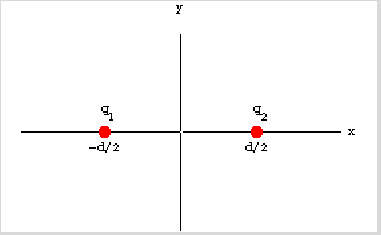

We want to calculate the electric field due to these charges at an arbitrary point P. To do this we must decompose the electric fields from the charges $q_1$ and $q_2$ into their $x$ and $y$ components. The geometry is shown below.

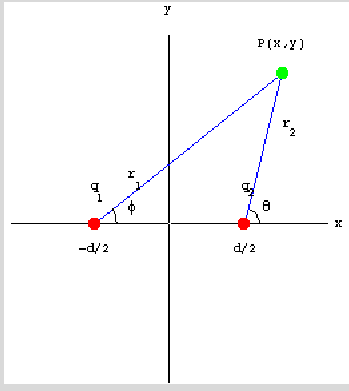

The electric field from the charge $q_1$ is<br>
$\textbf{E}_1(x,y) = E_{x,1}(x,y) \hat i + E_{y,1}(x,y) \hat j$<br>
Which means we can write:<br>
$E_{x,1} = \cos(\phi) E_1(x,y)$ and $E_{y,1}(x,y) = \sin(\phi) E_1(x,y)$.
<br>
We can rewrite the sine and cosine as:<br>
$\cos(\phi) = \frac{x + d/2}{r_1}$ and $\sin(\phi) = \frac{\gamma}{r_1}$. <br>
Since $E_1 (x,y) = \frac{q_1}{4 \pi \epsilon_0 r_1^2}$, we get <br>
$E_{x,1}(x,y) = q_1 \frac{x+d/2}{4\pi \epsilon_0 r_1^3}$ and <br>
$E_{y,1}(x,y) = q_1 \frac{\gamma}{4 \pi \epsilon_0 r_1^3}$
<br><br>
Likewise:
<br>
$\textbf{E}_2(x,y) = E_{x,2}(x,y) \hat i + E_{y,2}(x,y) \hat j$<br>
Which means we can write:<br>
$E_{x,2} = \cos(\phi) E_2(x,y)$ and $E_{y,2}(x,y) = \sin(\phi) E_2(x,y)$.
<br>
We can rewrite the sine and cosine as:<br>
$\cos(\phi) = \frac{x + d/2}{r_2}$ and $\sin(\phi) = \frac{\gamma}{r_2}$. <br>
Since $E_2 (x,y) = \frac{q_2}{4 \pi \epsilon_0 r_2^2}$, we get <br>
$E_{x,2}(x,y) = q_2 \frac{x+d/2}{4\pi \epsilon_0 r_2^3}$ and <br>
$E_{y,2}(x,y) = q_2 \frac{\gamma}{4 \pi \epsilon_0 r_2^3}$
<br><br>
The total electric field is:<br>
$\textbf{E}_T (x,y) = (E_{x,1}(x,y) + E_{x,2}(x,y))\hat i + (E_{y,1}(x,y) + E_{y,2}(x,y)) \hat j$<br>
which we can write as:<br>
$\textbf{E}_T(x,y) = (q_1 \frac{x+d/2}{4 \pi \epsilon_0 r_1^3} + q_2 \frac{x-d/2}{4 \pi \epsilon_0 r_2^3}) \hat i + (q_1 \frac{\gamma}{4 \pi \epsilon_0 r_1^3} + q_2 \frac{\gamma}{4 \pi \epsilon_0 r_2^3}) \hat j$

We want to write Python code that will do not only *this* calculation but that will also handle an arbitrary collection of point charges. We are actually going to do this symbolically, using the *sympy* Python library.

The point P, with coordinates {x,y} will be the location where we want to know the value of the electric field. 
We will also have a list of points where the charges are located: {x,1,y1},{x2,y2},....,{xn,yn}.

Our first step will be to write a function that will compute the distances between a point with coordinates {x,y} and a list of points with coordinates {x,1,y1},{x2,y2},....,{xn,yn}. We will need a small symbolic list to test our function on, called "pointList".

In [24]:
#Here we can use Symbolic Python code with the 'sympy' library (www.sympy.org)

import sympy as sym

#first we have to declare what symbols we will use in the expressions, as follows:
x, x1, x2, x3, y, y1, y2, y3, q, z = sym.symbols('x x1 x2 x3 y y1 y2 y3 q z')

#now lets make a list of the coordinates of 3 points:
pointList = [[x1, y1],[x2, y2], [x3,y3]]
pointList

[[x1, y1], [x2, y2], [x3, y3]]

The distance function will take one argument, a list of points. We can easily write this function in a single line.

In [25]:
def Distance(points):
    return [((x-i)**2 + (y-j)**2)**(1/2) for i,j in points]

Distance(pointList)

[((x - x1)**2 + (y - y1)**2)**0.5,
 ((x - x2)**2 + (y - y2)**2)**0.5,
 ((x - x3)**2 + (y - y3)**2)**0.5]

As you can see, this seems to work.
<br>
<br>
The next step is to write a function that computes the sine and cosine of the angle between the line that runs from the point {x,y} to the charge and the x axis. This function is called "SinesAndCosines"

In [26]:
def SinesAndCosines(points):
    
    distances = Distance(points)
    
    x_list, y_list = zip(*points)
    
    list_eval = lambda v, li : [(v - i)/distances[k] for k,i in enumerate(li)]
    x_eval = list_eval(x, x_list)
    y_eval = list_eval(y, y_list)

    final = zip(x_eval, y_eval)
    final = [list(i) for i in list(final)]
    
    return list(final)
    

print(SinesAndCosines(pointList))

[[(x - x1)/((x - x1)**2 + (y - y1)**2)**0.5, (y - y1)/((x - x1)**2 + (y - y1)**2)**0.5], [(x - x2)/((x - x2)**2 + (y - y2)**2)**0.5, (y - y2)/((x - x2)**2 + (y - y2)**2)**0.5], [(x - x3)/((x - x3)**2 + (y - y3)**2)**0.5, (y - y3)/((x - x3)**2 + (y - y3)**2)**0.5]]


This function computes the required trig functions and outputs them in the form [Cos[angle], Sin[angle]]. 
<br>(Note that the sine/cosine is simply the x/y component of a line divided by its length)<br>
We can test our function with two charges one at [-d/2,0] and the other at [d/2,0]. This is the case we did by hand in the example above. We had better get the same answer

In [27]:
d, q1, q2 = sym.symbols('d q1 q2')

test_case = [[-d/2, 0],[d/2,0]]

charges= [q1, q2]

result = []
for i,v in enumerate(SinesAndCosines(test_case)):
    for c in SinesAndCosines(test_case)[i]:
        result.append(charges[i] * c)
print(result)

[q1*(d/2 + x)/(y**2 + (d/2 + x)**2)**0.5, q1*y/(y**2 + (d/2 + x)**2)**0.5, q2*(-d/2 + x)/(y**2 + (-d/2 + x)**2)**0.5, q2*y/(y**2 + (-d/2 + x)**2)**0.5]


and indeed our new function gives us the same result as earlier.

We can now write a function which computes the electric field from each point charge. This function is called "Efields". In addition to the location of each point charge (xi,yi), we will also need the magnitude of the charge qi. So the Efields function will take a list of the form [[q1,[x1,y1]],[q2,[x2,y2],[q3,[x3,y3]]].

In [28]:
import numpy as np

π, ϵ0 = sym.symbols('π ϵ0')


def Efields(point_list):
    charges = [i[0] for i in point_list]
    points = [i[1] for i in point_list]
    
    result=[]
    for i,v in enumerate(SinesAndCosines(points)):
        for c in SinesAndCosines(points)[i]:
            result.append(charges[i] * c)

    final=[]
    for j,l in enumerate(result):
        d = Distance(points)[j//2]
        final.append(result[j] / (d*d * 4*π*ϵ0))

    
    return final

# quick test using wo point charges a distance d apart, as in our earlier example:
two_charges = [[q1,[-d/2,0]],[q2,[d/2,0]]]


Efields(two_charges)

[q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5),
 q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5),
 q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5),
 q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5)]

which is what we got from our hand calculation. 
Note that the output here is a set of x and y components of the E field due to each point charge in turn.
The only thing left is to sum the x and y components to get the total electric field. This is done by the function "TotalEfield".
<br>
The x components are given by the even entries of the list, and the y components are given by odd. Here's a quick way to sum them:

In [29]:
def TotalField(charges):
    return (sum(Efields(charges)[::2]), sum(Efields(charges)[1::2]))
TotalField(two_charges)

(q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5),
 q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))

This code will compute the electric field from any collection of point charges. In addition, we will want the magnitude of the electric field, which is computed by the function "MagnitudeEfield"

In [30]:
def MagnitudeEfield(charges):
    return sym.sqrt(sum([i**2 for i in TotalField(charges)]))

print(MagnitudeEfield(two_charges))

sqrt((q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))**2 + (q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))**2)


### Computing Electric Potentials

We can also develop similar code to compute the *electric potential* due to a collection of point charges. This is actually an easier calculation since, for potentials, we do not have to worry about vector components.
<br>
(If you have not encountered electric potentials yet, don't worry - you will meet them very soon. The key idea is that the electric potential is a scalar quantity, from which the electric field can be determined. 
Thus, the electric potential is just a number whose value depends on the distance from the charge- there is no direction to an electric potential. This is similar to the idea of a gravitational potential in mechanics, and then the gravitational force results from changes in the potential.)

In [31]:
def Potential(charges):
    charges_only = [i[0] for i in charges]
    points = [i[1] for i in charges]
    distances = Distance(points)

    res=[]
    for i in range(0,len(charges)):
        res.append(charges_only[i]/((4*π*ϵ0)*distances[i]))
    
    return sum(res)

Representation of Electric Fields and Potentials

Be warned: In this section and in what follows, we are sloppy with units (that is, we ignore them completely). Keep this in mind when comparing this Lab to what you learn in the Lecture part of the course.

Suppose that our two charges have equal but opposite charges. Let the charge on the left have charge $q_1 = +4 \pi \epsilon_0 $ and the charge on the right have charge $q_2 = -4 \pi \epsilon_0$. The strange units of $\epsilon_0$ get rid of all the factors of $\epsilon_0$ that would otherwise be floating around but will not change the physics. We can set $d=1$.

How will we visualize the electric field? We need to plot both the direction and the magnitude of the field. There is a python function which will plot a vector field. It is in the package *matplotlib*. The  command we want is *quiver* (because it draws arrows, I guess). The syntax for quiver and some examples to get started are shown here:

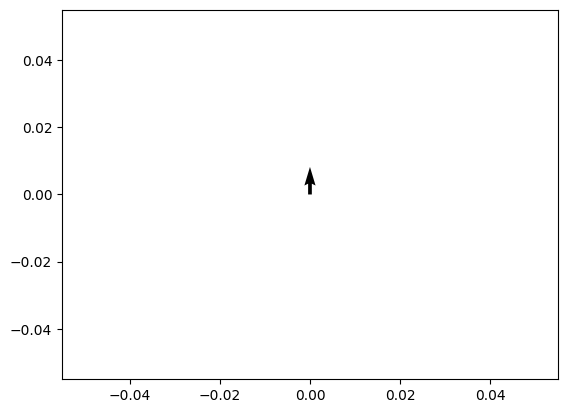

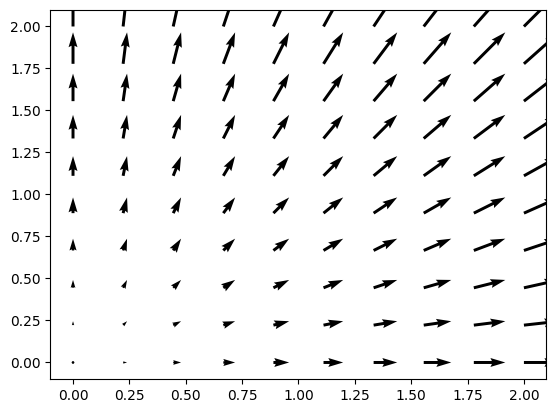

In [32]:
# example quiver code - not specific to our E field application yet
from matplotlib import pyplot as plt

# lets first do a basic example and plot a single arrow at the origin, pointing straight up
# the quiver function to draw arrows takes 4 arguments:  quiver(X, Y, U, V)
# here X, Y are the locations at which to *draw the arrows*, 
# and then U,V are the x and y components for the arrows themselves.
# so in our basic example, there will be one arrow located at the origin:
single_arrow_x_loc = 0
single_arrow_y_loc = 0
# and the arrow will have length 1 unit along the Y-axis, and zero length along x
single_arrow_x_length = 0
single_arrow_y_length = 1
# now lets draw this

plt.quiver(single_arrow_x_loc,single_arrow_y_loc,single_arrow_x_length,single_arrow_y_length)
plt.show()

# now lets do something that comes closer to what we will need for a vector field representation
# we will first plot many arrows at locations spanning a region in xy

# first lets define the range of the x and y axes, and how many points along the way where we will draw arrows
# we can use numpy linspace to define a range from start to end, with Npoints equally spaced in between:
# np.linspace(start,end,Npoints)
X = np.linspace(0,2,10)  # so, 10 points between 0 and 2
Y = np.linspace(0,2,10)
# to span the space, we can make a 'meshgrid' which will create a grid of  points across the 2D xy space we defined
xx,yy = np.meshgrid(X,Y)
# meshrid returns the x and y coords of all the grid points as two separate arrays, xx and yy here

# the quiver function to draw arrows takes 4 arguments:  quiver(X, Y, U, V)
# here X, Y are the locations at which to *draw the arrows*, so we could use the grid points that we just made
# and then U,V are the x and y components for the arrows themselves.
# later we will make those be the components

# For now, to take a concrete example, we can just make the arrows at each xy point have the same components as the point itself:
U, V = np.meshgrid(X,Y)

# now lets plot this
fig, ax = plt.subplots()
quiv2 = ax.quiver(X, Y, U, V)
plt.show()

Now lets work on plotting the field from our two charges.
We will need to define the set of grid points where we plan to draw arrows - this uses a function called *meshgrid* (some more information on meshgrid is provided in an Appendix at the end of this notebook).
After we have the grid, then we have to calculate the values (x and Y components) of the arrow at each location.

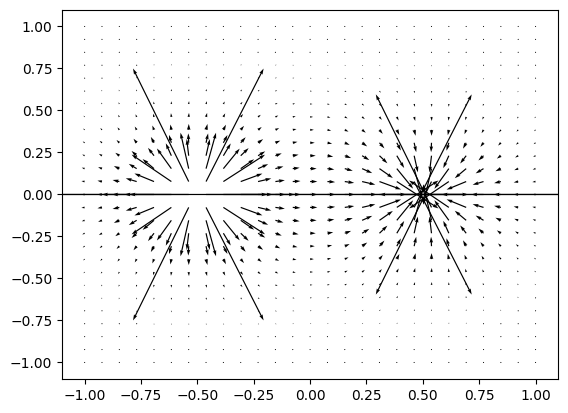

In [33]:

# first define the x and y axes range, and how many points in between to draw arrows at
# note that we dont want to choose a point for this grid which happens to lie exactly at the same location
# as one of the charges, because then the field will be infinite at that location! and our code will not work
X = np.linspace(-1,1,27)
Y = np.linspace(-1,1,27)

# lets make this into a grid of points
xx, yy = np.meshgrid(X,Y)
# this meshgrid function returns two sets of x and y values that together define all the grid points (xi,yi)
# more information on meshgrid is provided in an Appendix at the end of this document


# now our arrow at each point (xi,yi) will represent the Electric field strength at that point
# that is a vector with components Ex(xi,yi) and Ey(xi,yi)

(our_Ex, our_Ey) = TotalField(two_charges)

# to evaluate the symbolic expression, we need to substitute values for the symbols
# we also need to build arrays of the set of Ex, Ey components for each of the grid points
# in a structure that mimics that of the grid points (which is a little complicated, from meshgrid)
# the following code will do that
Ex_values = []
Ey_values = []
# take the y values one at a time
for yi in Y:
    thisline_Ex = []
    thisline_Ey = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the Ex,Ey components of the E field
        thisline_Ex.append(our_Ex.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
        thisline_Ey.append(our_Ey.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
    # at the end of all x for this yi, add it to the array
    Ex_values.append(thisline_Ex)
    Ey_values.append(thisline_Ey)
    
#print(Ex_values)
    
# we do a couple of manipulations of these values now before quiver can plot them:

Ex_values = np.asarray(Ex_values)
Ey_values = np.asarray(Ey_values)

#without this, quiver will not be able to plot our vectors
Ex_values = Ex_values.astype(float)
Ey_values = Ey_values.astype(float)

# and now draw the arrows at the defined grid points to show the E field:
fig, ax = plt.subplots()
quiv1 = ax.quiver(xx, yy, Ex_values, Ey_values)

plt.show()


The above plot is correct, but it doesn't look great, and it can be a bit hard to interpret. 

The issue is that the electric field from a point charge falls off as $\frac{1}{r^2}$.  
As a result, the arrows (which point in the direction of the field and have a length that is proportional to the magnitude of the field) quickly become too small to see as one gets far from the charge, while in other locations close to the charge, they are very large and can obscure other arrows. 
To fix this visual representation, we can *normalize* each arrow vector by dividing by the magnitude of each vector. This will make all the arrows the same size, which will help us see better the field direction at all locations. 

Then, to visualise the *strength* of the field when the arrows are all the same size, we will draw *contours* connecting points where the E field has the same magnitude. 


We will also plot some points to show the location of the charges.

[6.26310650e+10 3.70268514e+11 2.18898996e+12 1.29410869e+13
 7.65063955e+13]


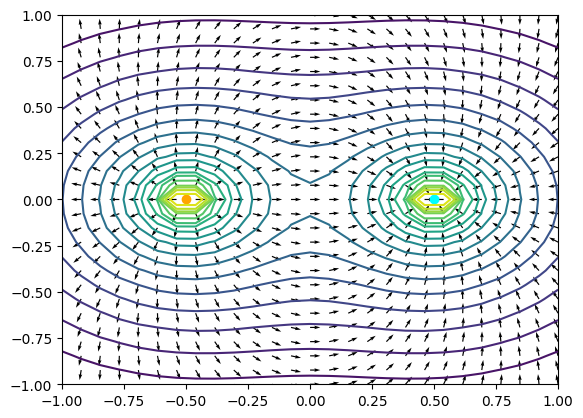

In [34]:
# we should still be able to work with the meshgrid xx,yy and the Ex,Ey components from previous cell

# now we want to calculate the *magnitude* of the E field at each point in the plotting grid:

E_mags = []
for yi in Y:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the magnitude components of the E field
        thisline.append(MagnitudeEfield(two_charges).subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags.append(thisline)
    
#print(E_mags)
    
E_mags = np.asarray(E_mags)
#print(E_mags.max())
#print(E_mags)


# now divide the Ex, Ey components at each point by the magnitude to normalise them
Ex_values_norm = Ex_values/E_mags
Ey_values_norm = Ey_values/E_mags

# need to do the following or quiver will not plot the values
Ex_values_norm = Ex_values_norm.astype(float)
Ey_values_norm = Ey_values_norm.astype(float)


quiv = plt.quiver(xx, yy, Ex_values_norm, Ey_values_norm)
# also illustrate where the charges are located
plt.plot(-0.5,0,marker="o",color="Orange")
plt.plot(0.5,0,marker="o",color="Cyan")



# now we can plot contours, linking locations in the grid which have the same magnitude of E field
E_mags = E_mags.astype(float)
#matplotlib provides a contour function, with arguments:
# xpoints, ypoints, Z_axis_values, and Number contours to draw  (here 100)
#cp = plt.contour(xx, yy, E_mags, 100)

#alternative, since the E field can be very large in the vicinity of the point charges, and small far away,
# we may prefer to show contours using a logarithmic scale
# one way to do that :
#from matplotlib import ticker
from matplotlib import colors

levels=np.logspace(np.log10(E_mags.min()),np.log10(E_mags.max()),5)
print(levels)

#cp = plt.contour(xx, yy, E_mags, levels=np.logspace(np.log10(E_mags.min()),np.log10(E_mags.max()),50),locator=ticker.LogLocator())
cp = plt.contour(xx, yy, E_mags, levels=np.logspace(np.log10(E_mags.min()),np.log10(E_mags.max()),20),norm=colors.LogNorm())

plt.show()

#Note that the contour curves here may look a little blocky, 
# because we are using the same, somewhat-sparse grid used for drawing the arrows
# if we wanted to, we could define a denser grid spacing for the contour plotting


The arrows show the direction of the electric field. <u>They are all the same length and have nothing to do with the magnitude of the electric field.</u> The contours are what are called "equipotential lines"; they represent surfaces of constant electric potential.  This lets us say something about the magnitude of the electric field: the closer the contours are, the more rapidly the field is changing. Note that the contour lines do not stop as they do in the figure, you may increase the 4th argument of plt.contour to see more of the lines.

Overall, this should give us a pretty good visualisation of the Electric field from this two-charge configuration.

<h2>The Dipole Approximation</h2>

If we are "far away" from the charges we can make use of what is known as the *dipole approximation*. What does "far away" mean here? It means that the point P at which we want to find the E field is far away from the charge collection, compared to the separation between the charges. That is, if we had two charges separated by a distance $d$, and the point P is a distance $r$ away from the center of the charges, then "far away" would mean  $|r| \gg d$. 
<br>To simplify things a little,
we will look only at the on-axis case where we are on the y-axis (that is, our x-coordinate is zero).<br><br>
Suppose we have two charges with equal but opposite charges and that our charges are separated by a distance d. By symmetry the y component of the electric field is zero. The x component of the electric field is 

In [35]:
onaxis_x, onaxis_y = TotalField(two_charges)

OnAxisField = (onaxis_x.subs({q1: q, q2: -q, x: 0}), onaxis_y.subs({q1: q, q2: -q, x: 0}))
OnAxisField

(d*q/(4*π*ϵ0*(d**2/4 + y**2)**1.5), 0)

Now suppose that $ d \ll y$ and let $z=\frac{d}{y}$. Notice that $z$ is dimensionless and small. This means that we can series expand (using a Taylor series) our expression for small $z$. First we make the substitution.

In [36]:
onaxis_x.subs({q1: q, q2: -q, x: 0, y: d/z})

d*q/(4*π*ϵ0*(d**2/4 + d**2/z**2)**1.5)

Then, after expansion and substituting $z$ for $d/y$, we find:

In [37]:
dipole = (d*q)/(4*π*y**3*ϵ0)

This is the dipole approximation result. Notice that in this approximation the field depends only on the product (d q) and not on d or q separately; the product "d q" is called the *electric dipole moment*. Thus, in the dipole approximation we can only measure the product of d and q not d and q separately . This is not true in higher order approximations.<br><br>
How far away from the two charges must we be before the dipole approximation is good? The easiest way to find out is to plot the exact result and the dipole approximation on the same graph. 

In [38]:
exact = onaxis_x.subs({q1: 4*np.pi, q2: -4*np.pi, x: 0, π: np.pi, d: 1, ϵ0: 1})
exact

1.0/(y**2 + 1/4)**1.5

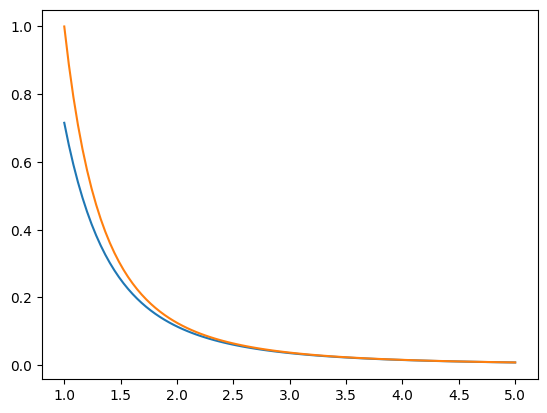

In [39]:
dipole_x = np.linspace(1,5,100)

exact_curve = [exact.subs({y: i}) for i in dipole_x]
approx_curve = [dipole.subs({q: 4*np.pi, π: np.pi, d: 1, ϵ0: 1, y: i}) for i in dipole_x]
plt.plot(dipole_x, exact_curve)
plt.plot(dipole_x, approx_curve)
plt.show()

You can see that the dipole approximation (orange) is very good for $y=3$ and above (ie roughly three times the separation between the charges, since we had $d$=1 here)

<h2>The Electric Field From Four Point Charges</h2>

The same code can be used to investigate more complicated charge configurations. Suppose we have four equal charges at the corners of a square of length d.

In [40]:
q3, q4 = sym.symbols('q3 q4')
#note that q1,q2 were already defined as symbols earlier, so we only need to define q3,q4 now
four_charges = [[q1,[-d/2,d/2]],[q2,[d/2,d/2]],[q3, [-d/2,-d/2]], [q4,[d/2,-d/2]]]

C:\Users\masma\AppData\Local\Temp\ipykernel_12936\4037399334.py:45: RuntimeWarning: invalid value encountered in cast
  Ex4_values_norm = Ex4_values_norm.astype(float)
C:\Users\masma\AppData\Local\Temp\ipykernel_12936\4037399334.py:46: RuntimeWarning: invalid value encountered in cast
  Ey4_values_norm = Ey4_values_norm.astype(float)


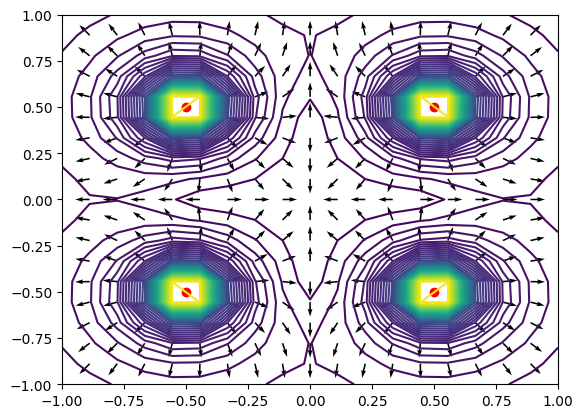

In [41]:
# now lets define our grid, and make the quiver and contour plots like we did in the two-charge 
X = np.linspace(-1,1,19)
Y = np.linspace(-1,1,19)

xx, yy = np.meshgrid(X,Y)

(our_Ex4, our_Ey4) = TotalField(four_charges)


# to evaluate the symbolic expression, we need to substitute values for the symbols
# we also need to build arrays of the set of Ex, Ey components for each of the grid points
# in a structure that mimics that of the grid points (which is a little complicated, from meshgrid)
# we can also calc the E field magnitude at the gridpoint at the same time
# the following code will do that
Ex4_values = []
Ey4_values = []
E4_mags = []
# take the y values one at a time
for yi in Y:
    thisline_Ex = []
    thisline_Ey = []
    thisline_Emag = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the Ex,Ey components of the E field
        thisline_Ex.append(our_Ex4.subs({q1: 4*np.pi, q2: 4*np.pi, q3: 4*np.pi, q4: 4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
        thisline_Ey.append(our_Ey4.subs({q1: 4*np.pi, q2: 4*np.pi, q3: 4*np.pi, q4: 4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
        #also eval the magnitude of E field at this point
        thisline_Emag.append(MagnitudeEfield(four_charges).subs({q1: 4*np.pi, q2: 4*np.pi, q3: 4*np.pi, q4: 4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
    # at the end of all x for this yi, add it to the array
    Ex4_values.append(thisline_Ex)
    Ey4_values.append(thisline_Ey)
    E4_mags.append(thisline_Emag)
    

Ex4_values = np.asarray(Ex4_values)
Ey4_values = np.asarray(Ey4_values)
E4_mags= np.asarray(E4_mags)

#normalize the vectors to plot equal-lenght arrows everywhere
Ex4_values_norm = Ex4_values/E4_mags
Ey4_values_norm = Ey4_values/E4_mags


Ex4_values_norm = Ex4_values_norm.astype(float)
Ey4_values_norm = Ey4_values_norm.astype(float)
E4_mags = E4_mags.astype(float)

quiv = plt.quiver(xx, yy, Ex4_values_norm, Ey4_values_norm)
plt.plot(-0.5,-0.5,marker="o",color="Red")
plt.plot(-0.5,0.5,marker="o",color="Red")
plt.plot(0.5,-0.5,marker="o",color="Red")
plt.plot(0.5,0.5,marker="o",color="Red")

#plot countours linking points of same E magnitude
cp = plt.contour(xx, yy, E4_mags, 100)


plt.show()

<h2>An Electrostatic Trap?</h2>

Notice that the electric field in the center of the above configuration is zero (because the components coming from each of the four charges cancel each other out). Can we use this to make an electrostatic trap?  The potential that a test charge near the origin would see is

In [42]:
Well = Potential(four_charges)
Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, ϵ0: 1})

1.0/((x - 1/2)**2 + (y - 1/2)**2)**0.5 + 1.0/((x - 1/2)**2 + (y + 1/2)**2)**0.5 + 1.0/((x + 1/2)**2 + (y - 1/2)**2)**0.5 + 1.0/((x + 1/2)**2 + (y + 1/2)**2)**0.5

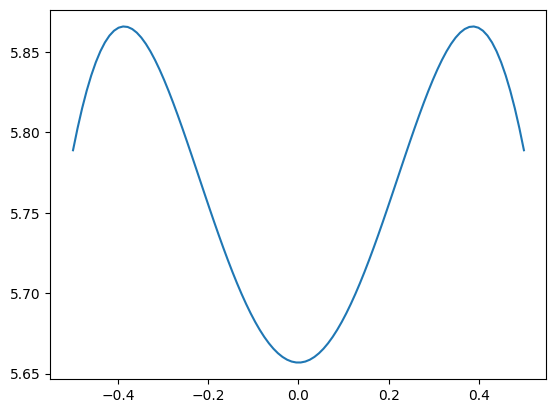

In [43]:
well_x = np.linspace(-0.5, 0.5, 100)
well_eval = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: 0, ϵ0: 1}) for i in well_x]

plt.plot(well_x,well_eval)
plt.show()

In two dimensions the potential near the center looks like:

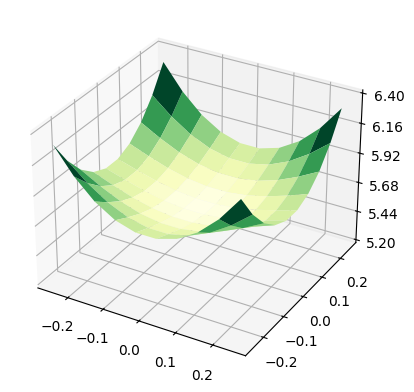

In [44]:
from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

well_x_3d = np.linspace(-0.25, 0.25, 10)
well_y_3d = np.linspace(-0.25, 0.25, 10)

wx, wy = np.meshgrid(well_x_3d, well_y_3d)

well_eval_3d = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in well_x_3d for j in well_y_3d]
well_eval_3d = np.asarray(well_eval_3d)
well_eval_3d = well_eval_3d.astype(float)
well_eval_3d = well_eval_3d.reshape(wx.shape)

surf = ax.plot_surface(wx, wy, well_eval_3d, cmap="YlGn", linewidth=0)

# Customize the z axis.
ax.set_zlim(5.2, 6.4)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()


But globally it's much more complicated.

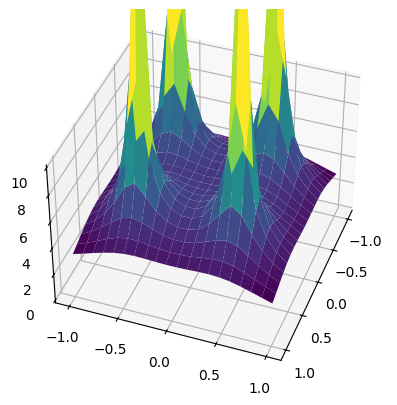

In [45]:
ax = plt.figure().add_subplot(projection='3d')

well_x_3d = np.linspace(-1, 1, 20)
well_y_3d = np.linspace(-1, 1, 20)

wx, wy = np.meshgrid(well_x_3d, well_y_3d)

well_eval_3d = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in well_x_3d for j in well_y_3d]
well_eval_3d = np.asarray(well_eval_3d)
well_eval_3d = well_eval_3d.astype(float)
well_eval_3d = well_eval_3d.reshape(wx.shape)

surf = ax.plot_surface(wx, wy, well_eval_3d, cmap="viridis", linewidth=0)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(6))

#set the view
ax.view_init(elev=40, azim=20)

plt.show()

Note: you may change the values of view_init to rotate the mesh.

It looks like a nice stable well (at least near the center) and so it might appear that we have a nice electrostatic trap. But actually we do not. In order to hold some new charged fixed at the center, it is not enough that the field be zero (ie there is a position of equilibrium), but that the equilibrium be *stable* - that is, that if the particle is deflected a tiny amount away from equilibrium, then the force will try to restore it to the equilibrium position. In the case above, if the particle were to deflected in some direction in the $xy$ plane, then indeed the force tries to restore it to the center position. But the issue is in the $z$ direction: if the particle is deflected at all along the $z$ direction, then the force will repel it further, so the equilibrium is not stable. 

(In general, 
one cannot make an electrostatic trap from fixed arrangement of charges.)


<h2>Exercises</h2> The assignment for this lab is to complete the following problems.  <u>The submission should include your notebook with the  input code, the relevant outputs, and some sentences which explain the results.</u>  The code should be self-contained and should run without any further input; that is, we should be able to simply run your notebook from beginning to end in order to reproduce your outputs.

<h3> Problem One: A Single Charge, at Different Locations</h3>

We will start simple, and make sure you can reproduce the electric field just from a single point charge.

(a) Start by considering a charge $q = + 4 \pi \epsilon_0$, located at the origin $(0,0)$. 
You should first define the charge arrangement as was done for the case of two/four charges above.
Then you can use the existing E-field functions above (you do not need to redefine those functions, and indeed you should not redefine them!) to calculate the E-field component from this single charge at any point in $xy$ space.

For plotting, you can define the meshgrid from -1 to 1 in $x,y$, and plot normalised arrows to show the field direction, and contours for the field magnitude.
Check that the field plotted makes sense - you should see all the field lines radiating outward from the origin. 

(b) Now change only the sign of the point charge from positive to negative (with same magnitude) and replot. Verify that the field lines now all change direction, and point inward toward the charge location at the origin. 

(c) Now suppose the single point charge is located not at the origin, but instead at some point $(a,b)$.
Setup the code to plot the E field from this charge. To actually plot it, you will need to put in some values for $a,b$.
In a grid from -1 to 1 for both x and y, you could consider the charge location to be say (+0.5,-0.25).
Verify that the field lines are now centred on the new location of the charge. 


Once you have verified these single-charge fields are  correct, you can increase the complexity of the charge arrangements in the next two problems

<h3>Problem Two: Eight Charges in Two Horizonal Lines</h3>

Now consider eight charges arranged in two horizontal lines, each with four equally spaced charges. Take the charges in the top line as positive charges and the charges in the bottom line as negative charges. Take the charges all to have a charge magnitude of $|q| = 4 \pi \epsilon_0$. 
Compute and plot the electric field from this charge arrangement, using a range of -1 to +1 for the x and y coordinates.
You should try some different values for the spacing between charges along a line, and for the spacing between the two lines. 
Discuss briefly what the electric field resembles in the region between the horizontal lines, and also at large distances from the charges.
<br><br>
(Note that if we increased the density of charges in this arrangement, the field produced by these charges would  approximate the field created by oppositely charged parallel plates = a capacitor!)


<h3>Problem Three: Six Charges in a Ring</h3>

Now consider the electric field due to six charges equally spaced around a ring of radius $a$. Take the charges all to have charge $q = 4 \pi \epsilon_0$. Set up your code so that you can easily vary the radius value $a$ to try different configurations. 
Compute and plot the electric field from this charge arrangement, using a range of -1 to +1 for the x and y coordinates. First make the radius of the charges relatively large (say a=0.8) and study the electric field in between the charges. What is the electric field at the very center?
Now consider the field at distances far from the ring - you can simulate this by using a small value for the radius, such as a=0.1. 
What does the field look like at large distances?





-------

## Appendix: Meshgrid Example

We use the *meshgrid* function from **numpy** to define a grid of points where we want to draw arrows
to illustrate the direction of the E field at that point. 
Below is a simple meshgrid example that can help understand the code syntax and usage

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[100 100 100]
 [200 200 200]
 [300 300 300]]


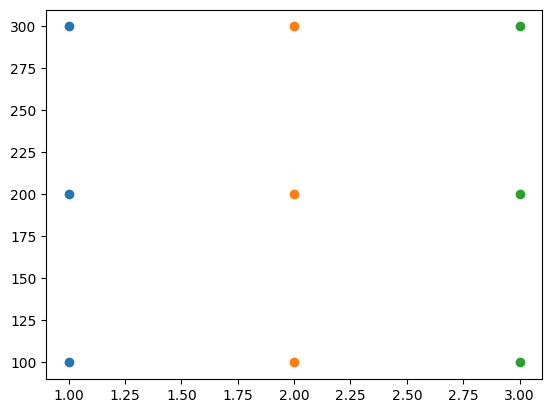

[[0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0. 0. 0.]
 [1. 1. 1.]]


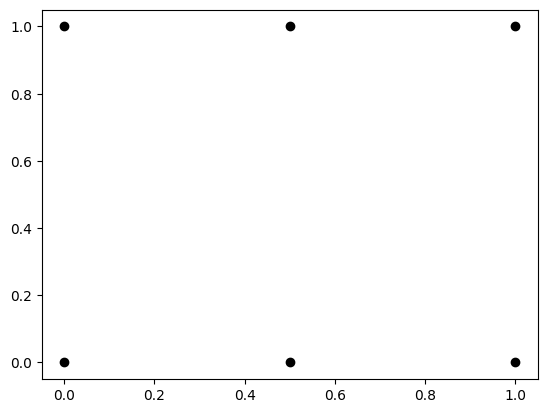

In [46]:
# meshgrid example, using: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html


# define a set of points to be the x,y range
xset1 = [1,2,3]
yset1 = [100,200,300]
# idea of meshgrid is that, in 2D, it should return xvalues and yvalues that together form the grid
meshx,meshy = np.meshgrid(xset1,yset1)
print(meshx)
print(meshy)

plt.plot(meshx,meshy,"o")
plt.show()


# another example, now using numpy.linspace to define a range of points in x,y, from start to finish, with N points between
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()
